In [21]:
import numpy as np
import pandas as pd
import regression as reg
import h5py
%matplotlib inline

from sklearn import ensemble
from sklearn import datasets
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error

N = 25000
N_val = 25000

train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

train_data = train_data.drop(['url'], axis=1) #remove 'url' information.
train_data = train_data.drop(['timedelta'], axis=1) #remove 'url' information.
train_data_names = list(train_data.columns.values)
X = np.matrix(train_data.drop(['shares'], axis=1))
y = np.matrix(train_data['shares']) #This is the target

X_train = X[:N,:] #use the first N samples for training
y_train = y[:,:N].T
y_train = np.ravel(y_train)
X_test = X[N_val:,:] #use the rests for validation
y_test = y[:,N_val:].T
y_test = np.ravel(y_test)

In [14]:
###############################################################################
# Fit regression model
params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 1,
          'learning_rate': 0.01, 'loss': 'ls'}
clf = ensemble.GradientBoostingRegressor(**params)

clf.fit(X_train, y_train)
mse = mean_squared_error(y_test, clf.predict(X_test))
print("MSE: %.4f" % mse)

MSE: 166615168.1146


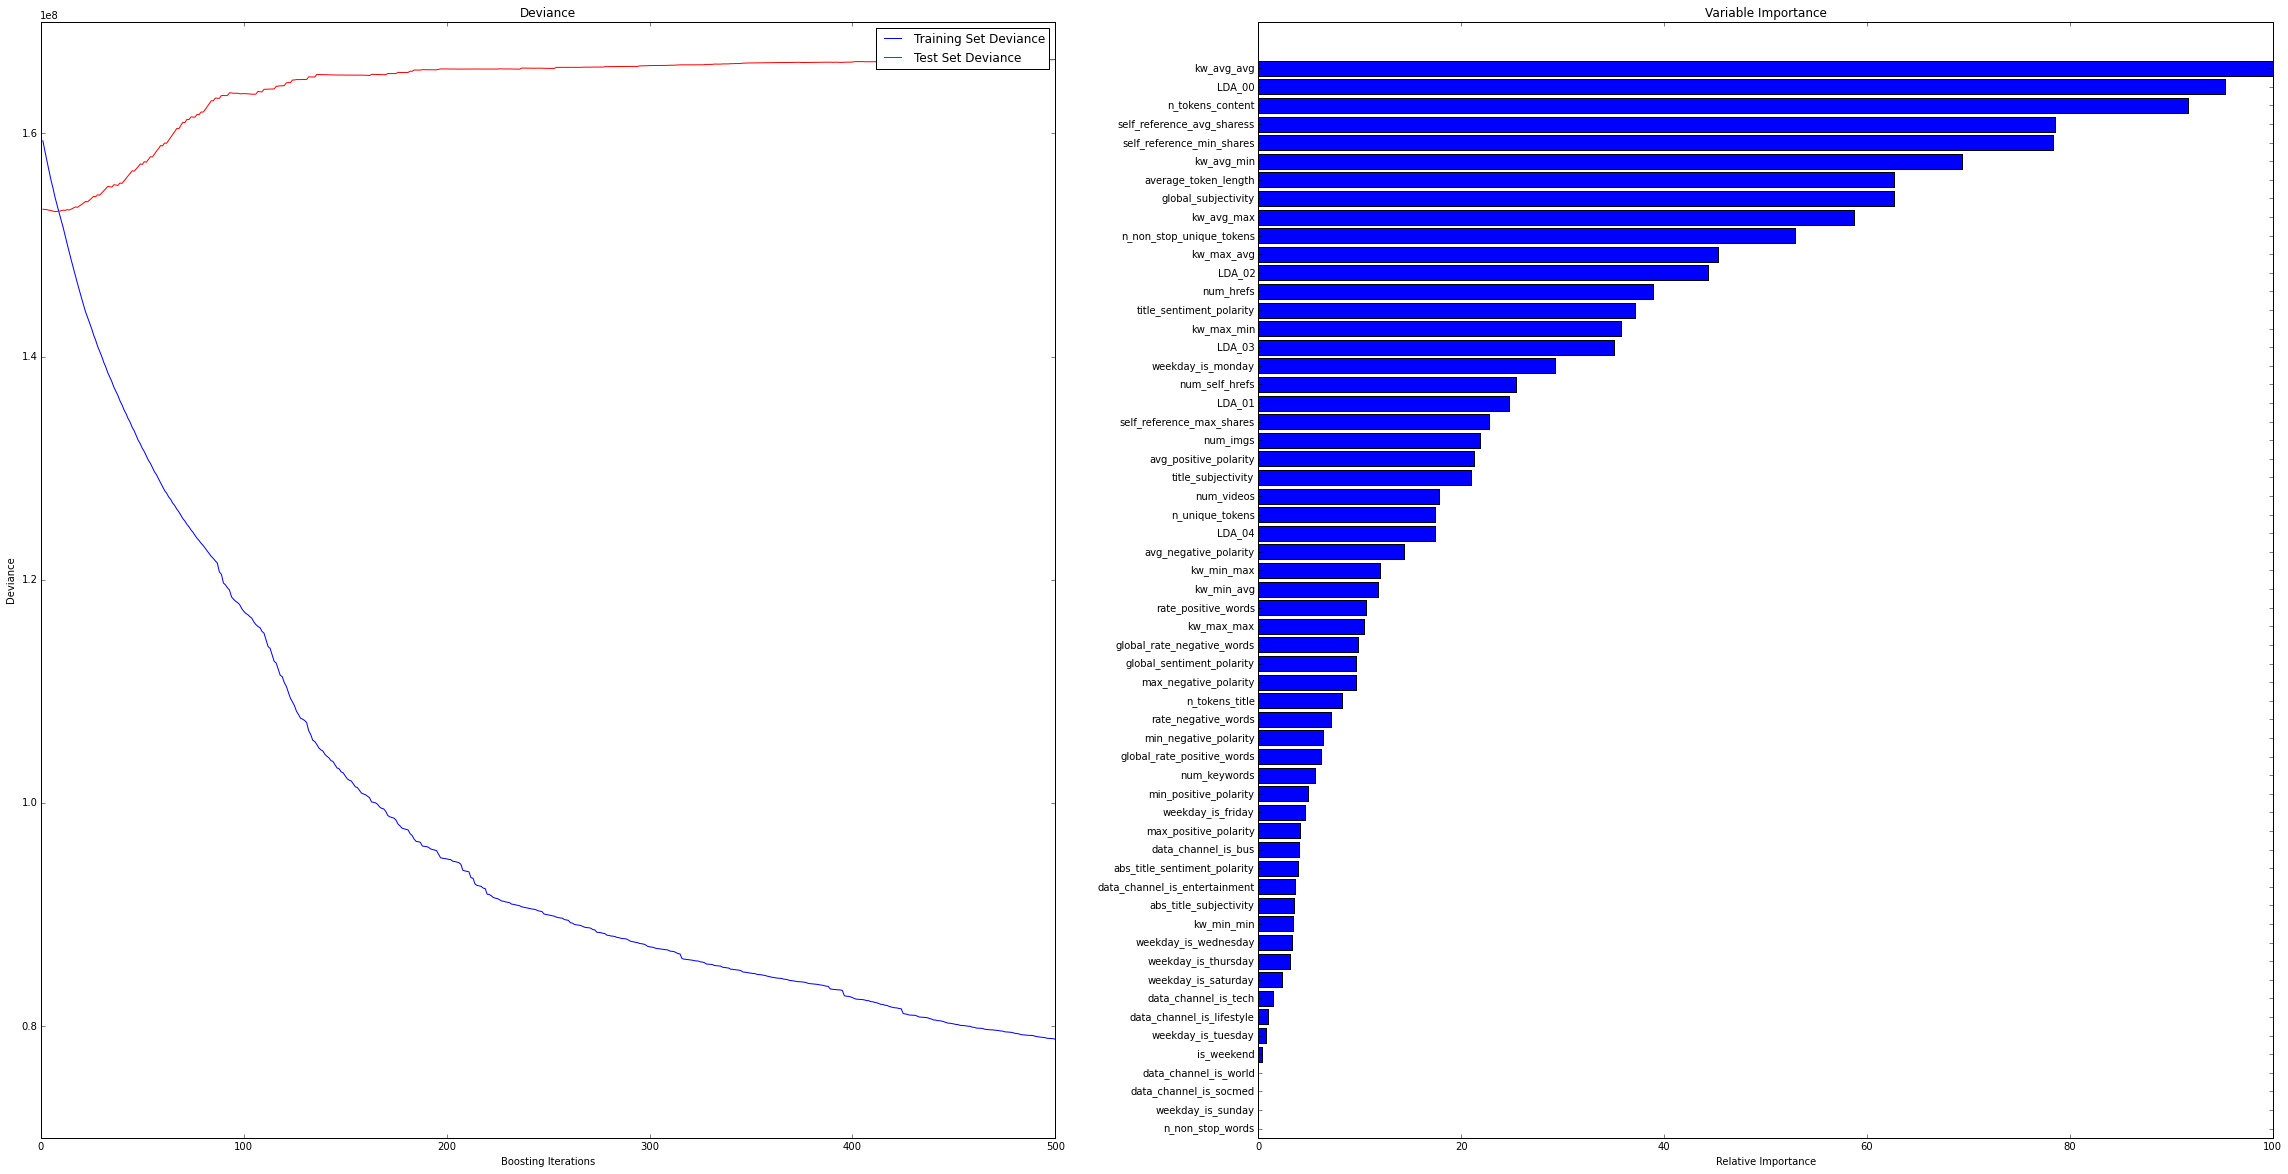

In [31]:
###############################################################################
# Plot training deviance

# compute test set deviance
test_score = np.zeros((params['n_estimators'],), dtype=np.float64)

for i, y_pred in enumerate(clf.staged_predict(X_test)):
    test_score[i] = clf.loss_(y_test, y_pred)

plt.figure(figsize=(40, 20))
plt.subplot(1, 2, 1)
plt.title('Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, clf.train_score_, 'b-',
         label='Training Set Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, test_score, 'r-',
         label='Test Set Deviance')
plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('Deviance')

###############################################################################
# Plot feature importance
feature_importance = clf.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, train_data.columns.values[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

In [27]:
train_data.columns.values

array(['n_tokens_title', 'n_tokens_content', 'n_unique_tokens',
       'n_non_stop_words', 'n_non_stop_unique_tokens', 'num_hrefs',
       'num_self_hrefs', 'num_imgs', 'num_videos', 'average_token_length',
       'num_keywords', 'data_channel_is_lifestyle',
       'data_channel_is_entertainment', 'data_channel_is_bus',
       'data_channel_is_socmed', 'data_channel_is_tech',
       'data_channel_is_world', 'kw_min_min', 'kw_max_min', 'kw_avg_min',
       'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg',
       'kw_max_avg', 'kw_avg_avg', 'self_reference_min_shares',
       'self_reference_max_shares', 'self_reference_avg_sharess',
       'weekday_is_monday', 'weekday_is_tuesday', 'weekday_is_wednesday',
       'weekday_is_thursday', 'weekday_is_friday', 'weekday_is_saturday',
       'weekday_is_sunday', 'is_weekend', 'LDA_00', 'LDA_01', 'LDA_02',
       'LDA_03', 'LDA_04', 'global_subjectivity',
       'global_sentiment_polarity', 'global_rate_positive_words',
       'global_rat

In [32]:
feature_importance

array([  8.29110197e+00,   9.16592702e+01,   1.74433940e+01,
         0.00000000e+00,   5.29245023e+01,   3.89034582e+01,
         2.54424552e+01,   2.18162575e+01,   1.77980891e+01,
         6.26538630e+01,   5.59569711e+00,   9.28215150e-01,
         3.59674221e+00,   4.06234489e+00,   0.00000000e+00,
         1.45536079e+00,   1.17449559e-02,   3.42109989e+00,
         3.57530763e+01,   6.93562317e+01,   1.19543313e+01,
         1.04032693e+01,   5.87247768e+01,   1.17997968e+01,
         4.52973056e+01,   1.00000000e+02,   7.83504549e+01,
         2.27014326e+01,   7.85709091e+01,   2.92521965e+01,
         7.23956370e-01,   3.30514533e+00,   3.08690833e+00,
         4.60895012e+00,   2.36922650e+00,   0.00000000e+00,
         3.65863522e-01,   9.52992556e+01,   2.47128474e+01,
         4.43400435e+01,   3.50264999e+01,   1.73881042e+01,
         6.26195543e+01,   9.65879968e+00,   6.19034644e+00,
         9.82575519e+00,   1.05912540e+01,   7.12408457e+00,
         2.12224058e+01,

In [44]:
import pickle
output = open('feature_importance.pkl', 'wb')


pickle.dump(feature_importance, output)
output.close()

In [41]:
print feature_importance

[  8.29110197e+00   9.16592702e+01   1.74433940e+01   0.00000000e+00
   5.29245023e+01   3.89034582e+01   2.54424552e+01   2.18162575e+01
   1.77980891e+01   6.26538630e+01   5.59569711e+00   9.28215150e-01
   3.59674221e+00   4.06234489e+00   0.00000000e+00   1.45536079e+00
   1.17449559e-02   3.42109989e+00   3.57530763e+01   6.93562317e+01
   1.19543313e+01   1.04032693e+01   5.87247768e+01   1.17997968e+01
   4.52973056e+01   1.00000000e+02   7.83504549e+01   2.27014326e+01
   7.85709091e+01   2.92521965e+01   7.23956370e-01   3.30514533e+00
   3.08690833e+00   4.60895012e+00   2.36922650e+00   0.00000000e+00
   3.65863522e-01   9.52992556e+01   2.47128474e+01   4.43400435e+01
   3.50264999e+01   1.73881042e+01   6.26195543e+01   9.65879968e+00
   6.19034644e+00   9.82575519e+00   1.05912540e+01   7.12408457e+00
   2.12224058e+01   4.91059177e+00   4.06915204e+00   1.43729347e+01
   6.40535587e+00   9.60429106e+00   2.09416369e+01   3.71222624e+01
   3.56467526e+00   3.90043212e+00